In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import minkowski, cityblock

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [ ]:
def zadanie_1():
    df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")
    print("Dane wejściowe (PersonalData):")
    print(df, "\n")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    A = df.loc["A", numeric_cols].astype(float)
    B = df.loc["B", numeric_cols].astype(float)
    print("Atrybuty numeryczne A:\n", A, "\n")
    print("Atrybuty numeryczne B:\n", B, "\n")
    #Ouklidesowa
    euclid = np.linalg.norm(A - B)
    print(f"Odległość euklidesowa d(A,B) (oryginalna skala): {euclid:.4f}")
    #Zmiana skali
    scaled = df.copy()
    if "Zarobki (tys.)" in scaled.columns:
        scaled["Zarobki (tys.)"] = scaled["Zarobki (tys.)"] * 1000

    A_scaled = scaled.loc["A", numeric_cols].astype(float)
    B_scaled = scaled.loc["B", numeric_cols].astype(float)
    euclid_scaled = np.linalg.norm(A_scaled - B_scaled)
    print(f"Odległość euklidesowa po zmianie skali zarobków: {euclid_scaled:.4f}")

    #Standaryzacja
    std = df[numeric_cols].std()
    df_std = df[numeric_cols] / std

    A_std = df_std.loc["A"]
    B_std = df_std.loc["B"]
    euclid_std = np.linalg.norm(A_std - B_std)
    print(f"Odległość euklidesowa: {euclid_std:.4f}")
    #Manhattan
    manhattan = np.abs(A - B).sum()
    print(f"Odległość Manhattan d(A,B): {manhattan:.4f}")
    #Minkowski
    p = 3
    minkowski = np.sum(np.abs(A - B) ** p) ** (1 / p)
    print(f"Odległość Minkowskiego (p={p}) d(A,B): {minkowski:.4f}")

In [ ]:
zadanie_1()

Dane wejściowe (PersonalData):
   Wzrost (cm)  Waga (kg)  Staz (lata)  Zarobki (tys.)  Ocena (pkt.)  Piętro  \
A          190         88            3             3.5             7       6   
B          172         70           12             4.3             5       1   

   Dzieci  Odleglosc (km) Ubezp.  
A       1              25    Tak  
B       4              12    Nie   

Atrybuty numeryczne A:
 Wzrost (cm)       190.0
Waga (kg)          88.0
Staz (lata)         3.0
Zarobki (tys.)      3.5
Ocena (pkt.)        7.0
Piętro              6.0
Dzieci              1.0
Odleglosc (km)     25.0
Name: A, dtype: float64 

Atrybuty numeryczne B:
 Wzrost (cm)       172.0
Waga (kg)          70.0
Staz (lata)        12.0
Zarobki (tys.)      4.3
Ocena (pkt.)        5.0
Piętro              1.0
Dzieci              4.0
Odleglosc (km)     12.0
Name: B, dtype: float64 

Odległość euklidesowa d(A,B) (oryginalna skala): 30.6046
Odległość euklidesowa po zmianie skali zarobków: 800.5848
Odległość euklidesowa:

## Zadanie 2

Napisz program pozwalający obliczać podobieństwo między sekwencjami DNA traktowanymi jako ciągi znaków.

Zaimplementować na podstawie metryki
$$
D(x, y) = |x| + |y| - 2|LCS(x,y)|
$$

gdzie LCS oznacza najdłuszą wspólna podsekwencję (ang.
longest common subsequence)
  
  (LCS(x,y) = bcde). D(x, y) = 3

In [ ]:
def lcs_length(x: str, y: str) -> int:
    """
    Długość najdłuższej wspólnej podsekwencji (LCS) dla x i y.
    Klasyczny algorytm dynamiczny O(len(x)*len(y)).
    """
    m, n = len(x), len(y)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i - 1] == y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp[m][n]

def get_D_x_y(x: str, y: str) -> int:
    """
    Metryka D(x,y) = |x| + |y| - 2|LCS(x,y)|
    """
    lcs = lcs_length(x, y)
    return len(x) + len(y) - 2 * lcs

def zadanie_2():
    x = "abcde"
    y = "bcdxye"
    print("x =", x)
    print("y =", y)
    print("D(x,y) =", get_D_x_y(x, y))  # oczekiwane 3

    X = "AGGTAB"
    Y = "GXTXAYB"
    print("X =", X)
    print("Y =", Y)
    print("D(X,Y) =", get_D_x_y(X, Y))  # oczekiwane 5

In [ ]:
zadanie_2()

x = abcde
y = bcdxye
D(x,y) = 3
X = AGGTAB
Y = GXTXAYB
D(X,Y) = 5


## Zadanie 3

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [ ]:
def zadanie_3():
    film1 = "kosmiczna stacja astronauta planeta obca"
    film2 = "astronauta rakieta księżyc misja kosmiczna"
    film3 = "wampir zamek noc krew mroczny"
    film4 = "rakieta mars astronauta czerwona planeta"

    docs = [film1, film2, film3, film4]
    labels = ["film1", "film2", "film3", "film4"]

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(docs)
    print("Słownik cech:", vectorizer.get_feature_names_out())

    #Macierz podobieństw
    sim = cosine_similarity(X)
    sim_df = pd.DataFrame(sim, index=labels, columns=labels)
    print("\nMacierz podobieństw cosinusowych:")
    print(sim_df)

    #Podobieństwo par
    sim_long = sim_df.stack().reset_index()
    sim_long.columns = ["film_i", "film_j", "similarity"]
    sim_long = sim_long[sim_long["film_i"] != sim_long["film_j"]]

    most_similar = sim_long.loc[sim_long["similarity"].idxmax()]
    least_similar = sim_long.loc[sim_long["similarity"].idxmin()]

    print("\nNajbardziej podobne filmy:")
    print(most_similar)

    print("\nNajmniej podobne filmy:")
    print(least_similar)

In [ ]:
zadanie_3()

Słownik cech: ['astronauta' 'czerwona' 'kosmiczna' 'krew' 'księżyc' 'mars' 'misja'
 'mroczny' 'noc' 'obca' 'planeta' 'rakieta' 'stacja' 'wampir' 'zamek']

Macierz podobieństw cosinusowych:
       film1  film2  film3  film4
film1    1.0    0.4    0.0    0.4
film2    0.4    1.0    0.0    0.4
film3    0.0    0.0    1.0    0.0
film4    0.4    0.4    0.0    1.0

Najbardziej podobne filmy:
film_i        film1
film_j        film2
similarity      0.4
Name: 1, dtype: object

Najmniej podobne filmy:
film_i        film1
film_j        film3
similarity      0.0
Name: 2, dtype: object


## Zadanie 4

A. Wczytaj dane z pliku **k_means_data.csv.**

B. Zastosuj **algorytm hierarchiczny aglomeracyjny** i wyszukaj w zbiorze danych klastry.

C. Zastosuj **algorytm k-średnich** i wyszukaj w zbiorze danych klastry.

In [ ]:
def zadanie_4():
    df = pd.read_csv("k_means_data.csv")
    print(df.head(), "\n")

    X = df.values

    agg = AgglomerativeClustering(n_clusters=3)
    labels_agg = agg.fit_predict(X)

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=labels_agg)
    plt.title("AgglomerativeClustering (k=3)")
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.show()


    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels_km = kmeans.fit_predict(X)

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=labels_km)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                marker="x", s=100, linewidths=3)
    plt.title("KMeans (k=3)")
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.show()

       # X1        X2
0  2.131415  1.138857
1  2.161723  0.656595
2  1.062696  5.176351
3  1.807096  0.449191
4  2.269087  1.321608 



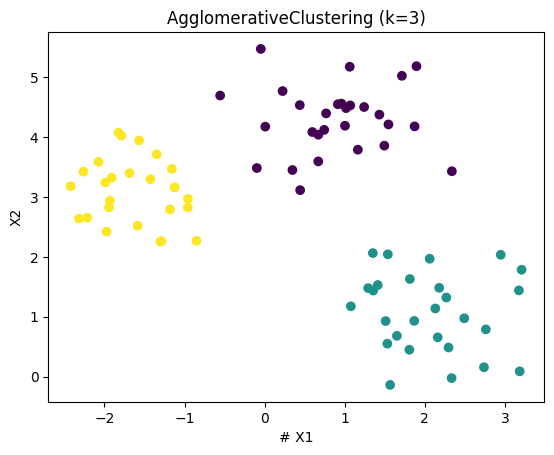

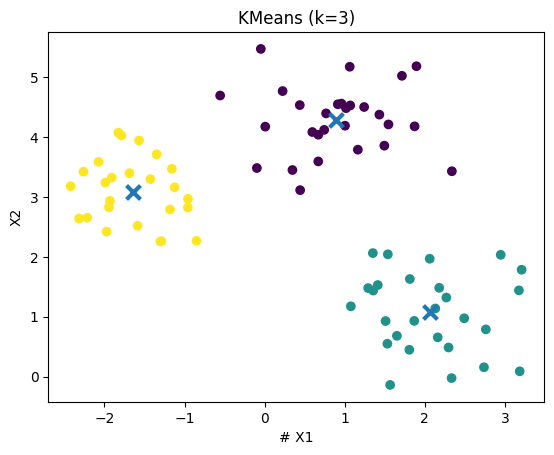

In [ ]:
zadanie_4()

## Zadanie 5

Zaimplementuj samodzielnie **algorytm k-średnich** dla danych z pliku **k_means_data.csv**.

In [ ]:
def kmeans_manual(X, k=3, max_iter=100, random_state=42):
    rng = np.random.RandomState(random_state)
    indices = rng.choice(len(X), size=k, replace=False)
    centroids = X[indices]

    for it in range(max_iter):
        distances = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(distances, axis=1)

        #Przeliczenie centroidów
        new_centroids = np.vstack([
            X[labels == j].mean(axis=0) for j in range(k)
        ])

        #Sprawdzenie zbieżności
        if np.allclose(centroids, new_centroids):
            print(f"Zbieżność po {it+1} iteracjach.")
            break

        centroids = new_centroids

    return labels, centroids

def zadanie_5():
    df = pd.read_csv("k_means_data.csv")
    X = df.values

    labels, centroids = kmeans_manual(X, k=3)
    print("Centroidy (implementacja własna):")
    print(centroids)

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker="x", s=100, linewidths=3)
    plt.title("KMeans (implementacja własna)")
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.show()

Zbieżność po 6 iteracjach.
Centroidy (implementacja własna):
[[ 2.27623543  0.71888946]
 [ 1.76095884  1.84372698]
 [-0.35552888  3.72714403]]


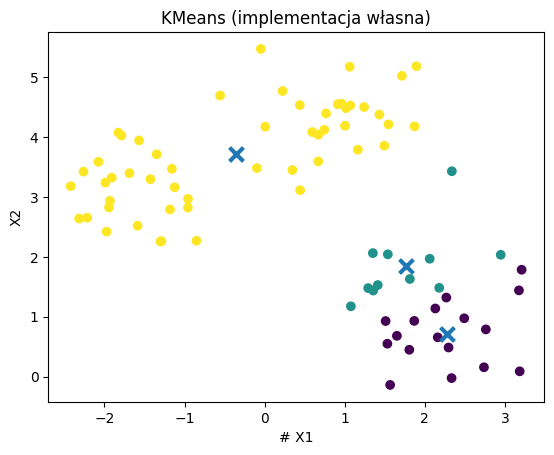

In [ ]:
zadanie_5()

## Zadanie 6

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

In [ ]:
def zadanie_6():
    #1
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    feature_names = iris.feature_names
    target_names = iris.target_names

    df = pd.DataFrame(X, columns=feature_names)
    df["target"] = y
    df["species"] = df["target"].map(lambda i: target_names[i])

    print("Informacje o zbiorze IRIS:")
    print(df.head(), "\n")
    print(df.describe(), "\n")

    #2
    plt.figure()
    sns.scatterplot(
        data=df,
        x=feature_names[0],
        y=feature_names[1],
        hue="species",
        style="species"
    )
    plt.title("Iris - długość vs szerokość")
    plt.show()

    #3
    stats_df = pd.DataFrame({
        "min": df[feature_names].min(),
        "max": df[feature_names].max(),
        "std": df[feature_names].std()
    })
    print("Statystyki (min, max, std):")
    print(stats_df, "\n")

    #4
    corr = df[feature_names].corr()
    print("Macierz korelacji atrybutów:")
    print(corr, "\n")

    plt.figure()
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Iris – macierz korelacji")
    plt.show()

    #5
    X_sw = df[[feature_names[0], feature_names[1]]].values

    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels_km = kmeans.fit_predict(X_sw)

    plt.figure()
    plt.scatter(X_sw[:, 0], X_sw[:, 1], c=labels_km)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                marker="x", s=100, linewidths=3)
    plt.title("Iris – algorytm k-średnich")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

    #6
    agg = AgglomerativeClustering(n_clusters=3)
    labels_agg = agg.fit_predict(X_sw)

    plt.figure()
    plt.scatter(X_sw[:, 0], X_sw[:, 1], c=labels_agg)
    plt.title("Iris – algorytm hierarchiczny aglomeracyjny")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

Informacje o zbiorze IRIS:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa   

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000         

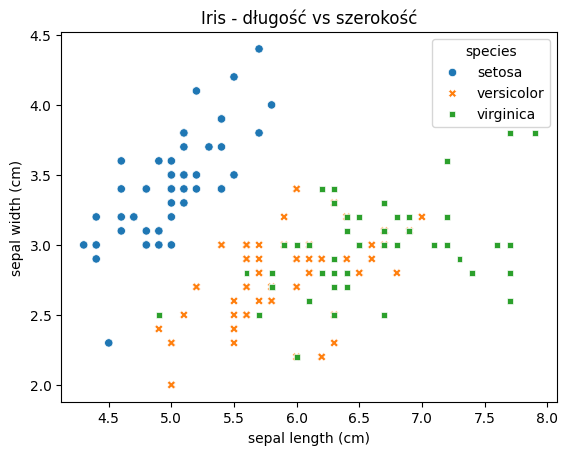

Statystyki (min, max, std):
                   min  max       std
sepal length (cm)  4.3  7.9  0.828066
sepal width (cm)   2.0  4.4  0.435866
petal length (cm)  1.0  6.9  1.765298
petal width (cm)   0.1  2.5  0.762238 

Macierz korelacji atrybutów:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000   



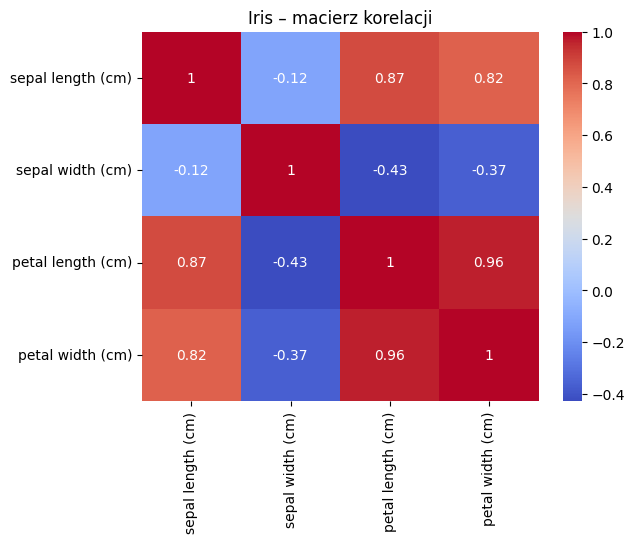

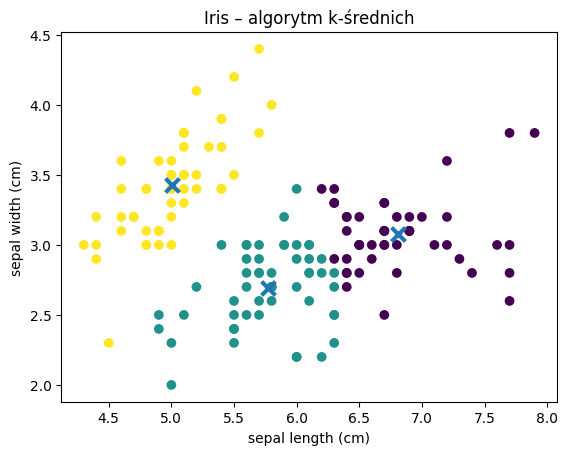

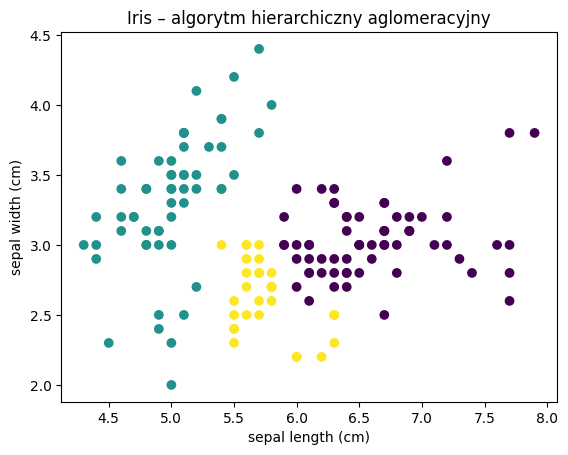

In [ ]:
zadanie_6()

## Zadanie 7
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [ ]:
def zadanie_7():
    df = pd.read_csv("penguins.csv")
    print("Podstawowe informacje o zbiorze penguins:")
    print(df.info())
    print(df.describe(include="all"), "\n")
    #1
    print("Liczba braków danych w kolumnach:")
    print(df.isna().sum(), "\n")
    df = df.dropna()
    #2
    cols = ["bill_length_mm", "flipper_length_mm"]
    X = df[cols].values
     #Różne metody linkage
    methods = ["complete", "average", "single", "ward"]

    for method in methods:
        print(f"\n=== Metoda linkage: {method} ===")

        #3
        Z = linkage(X, method=method)
        plt.figure(figsize=(8, 4))
        dendrogram(Z)
        plt.title(f"Penguins – dendrogram (linkage={method})")
        plt.xlabel("Próbki")
        plt.ylabel("Odległość")
        plt.tight_layout()
        plt.show()


        cluster_labels = fcluster(Z, 3, criterion="maxclust")
        print("Przykładowe etykiety klastrów z fcluster:", np.unique(cluster_labels))

        #4
        if method == "ward":
            agg = AgglomerativeClustering(
                n_clusters=3,
                linkage="ward"
            )
        else:
            agg = AgglomerativeClustering(
                n_clusters=3,
                linkage=method
            )
        labels_agg = agg.fit_predict(X)

        #5
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=labels_agg)
        plt.title(f"Penguins – klastry (Agglomerative, linkage={method})")
        plt.xlabel(cols[0])
        plt.ylabel(cols[1])
        plt.show()




Podstawowe informacje o zbiorze penguins:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
       species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      344     344      342.000000     342.000000         342.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       152     168             NaN            NaN       

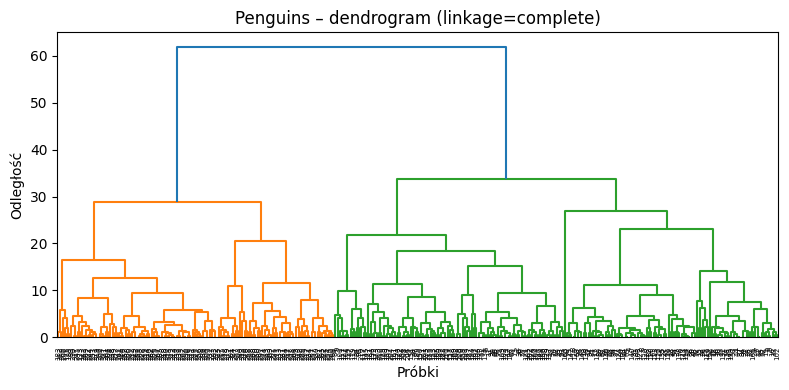

Przykładowe etykiety klastrów z fcluster: [1 2 3]


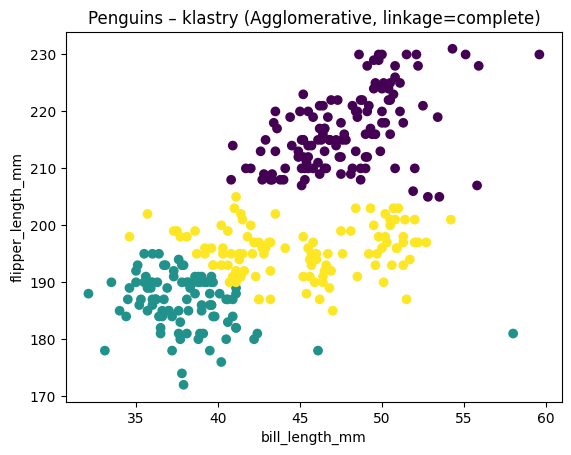


=== Metoda linkage: average ===


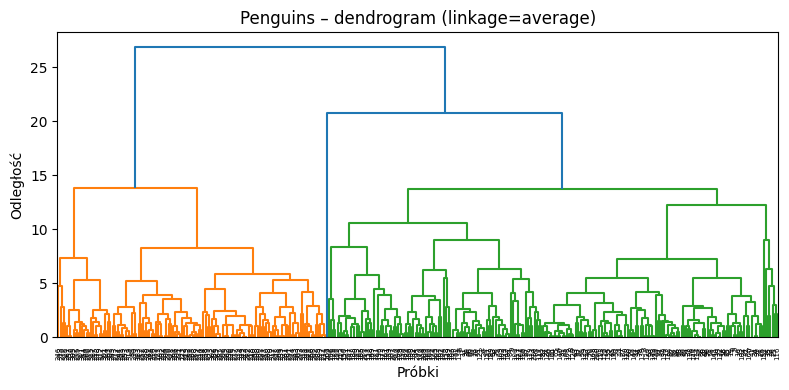

Przykładowe etykiety klastrów z fcluster: [1 2 3]


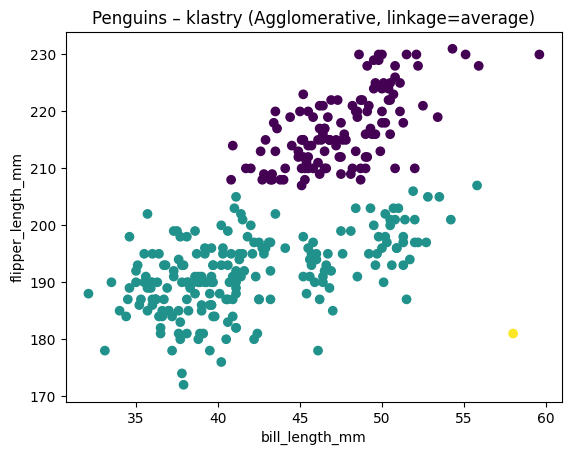


=== Metoda linkage: single ===


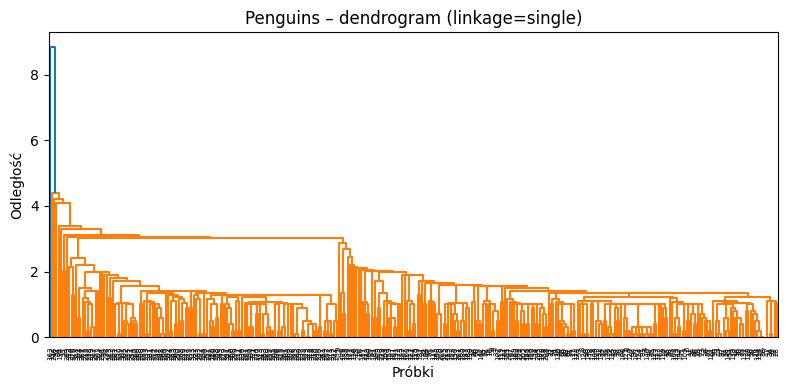

Przykładowe etykiety klastrów z fcluster: [1 2 3]


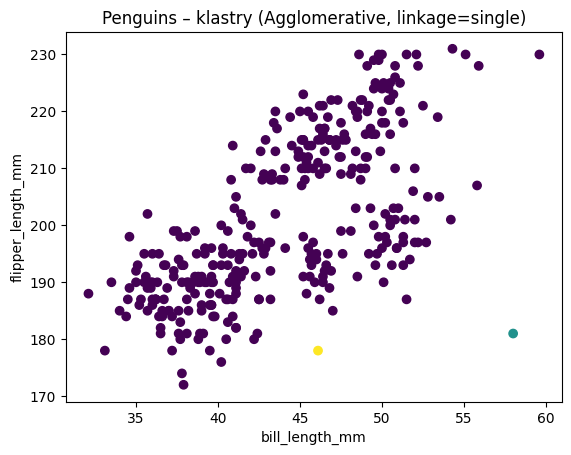


=== Metoda linkage: ward ===


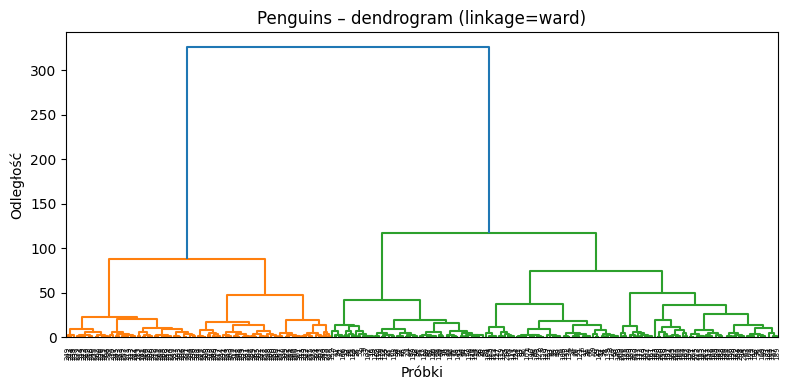

Przykładowe etykiety klastrów z fcluster: [1 2 3]


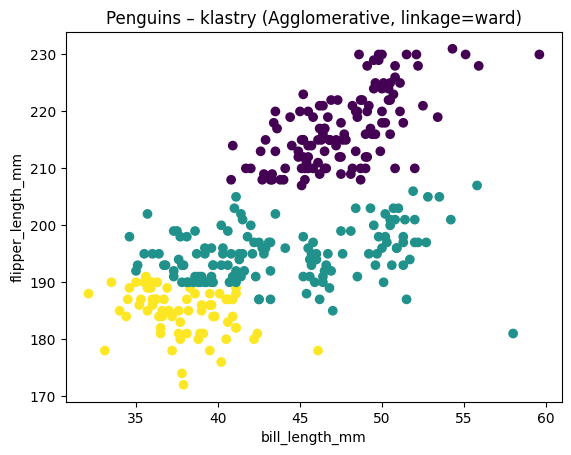

In [ ]:
zadanie_7()

In [ ]:
df

,Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Piętro,Dzieci,Odleglosc (km),Ubezp.
A,190,88,3,3.5,7,6,1,25,Tak
B,172,70,12,4.3,5,1,4,12,Nie


In [ ]:
df.loc['A']

,A
Wzrost (cm),190
Waga (kg),88
Staz (lata),3
Zarobki (tys.),3.5
Ocena (pkt.),7
Piętro,6
Dzieci,1
Odleglosc (km),25
Ubezp.,Tak
